In [1]:
import beta_glu
import pandas as pd
import numpy as np
import warnings
from sklearn import preprocessing
warnings.filterwarnings("ignore")

/Users/ryanjang123/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ryanjang123/opt/anaconda3/lib/python3.9/site-packages/Bio/SubsMat/__init__.py:126: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  warnings.warn(


In [2]:
import pandas as pd
import numpy as np

import pandascharm as pc
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OneHotEncoder
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import blosum as bl
from Bio.SubsMat.MatrixInfo import blosum62 as blosum
from Bio import AlignIO
from Bio import SeqIO
from Bio.Align.Applications import MuscleCommandline
from Bio.Align import AlignInfo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

In [3]:

df = pd.read_excel('../beta-glucosidase/data/Stability Data.xlsx')

In [4]:
output = 't1/2 (min)'
encoding = 'trigram'
aln = '../beta-glucosidase/data/kcatKm w_Temperatures.aln'

In [5]:
sample = df['Sequence'][0]

In [6]:
sample

'MTQIEERDQVESRPTLRFPDRFVWGVATSAYQIEGAVAEDGRGPSIWDTFSHTPGKVVGGDTGDVAADHYHRYVGDVRLMADLGVTSYRFSVAWPRILPSGSGAVNRAGLDFYSRLVDELLNHGITPALTLYHWDLPQALQDQGGWTNRATAQRFAEYAVVVARELGDRVNFWITLNEPWCAAFLGYGAGVHAPGHTDSAEALTAAHHLLLAHGLAVQALGSVLPPDCQMAITLNPAVARPASLAEEDVAAARKVDGLQNRLWLDPLFHGTYPQDVVNFTSKVTDWSFVRDNDLAVIATPFDILGVNYYNPVIVGHYAGSGSRGRDGHGQGTGETWPGCPDIQFPEWPFRRTAMGWPIDPSGLYELLIRLNRDYPRPIMITENGAAFDDVVTDNNRVRDPARAAYIQEHLAALHQAIADGVDVRGYYLWSLIDNFEWAYGYSRRFGIVYVDFETQERIIKDSGYFYSLVARTNTIAAP'

In [7]:
forge = np.array(list(sample))

In [8]:
index = np.arange(len(list(sample)))

In [9]:
np.random.choice(index, 3,replace = False)

array([370,  57, 327])

In [10]:
lst = ['E','G','L','Y','T','H','R','A','C','D','P','I','F','N','K','S','V','M','W','Q']

In [11]:
forge[465]

'Y'

In [12]:
np.random.choice(lst, 3)

array(['N', 'K', 'P'], dtype='<U1')

In [13]:
new_input = forge

In [14]:
for let,ind in zip(np.random.choice(lst, 3),np.random.choice(index, 3,replace = False)):
    print(ind)
    new_input[ind] = let
    

195
36
247


In [15]:
new_input[465]

'Y'

In [16]:
def rand_generate(inp, number_of_rand):
    lst = ['E','G','L','Y','T','H','R','A','C','D','P','I','F','N','K','S','V','M','W','Q']
    index = np.arange(len(list(inp)))
    new_input = np.array(list(sample))
    for let,ind in zip(np.random.choice(lst, 3),np.random.choice(index, 3,replace = False)):
        new_input[ind] = let
        
    return new_input

In [17]:
x = rand_generate(sample,3)

In [18]:
x

array(['M', 'T', 'Q', 'I', 'E', 'E', 'R', 'D', 'Q', 'V', 'E', 'S', 'R',
       'P', 'T', 'L', 'R', 'F', 'P', 'D', 'R', 'F', 'V', 'W', 'G', 'V',
       'A', 'T', 'S', 'A', 'Y', 'Q', 'I', 'E', 'G', 'A', 'V', 'A', 'E',
       'D', 'G', 'R', 'G', 'P', 'S', 'I', 'W', 'D', 'T', 'F', 'S', 'H',
       'T', 'P', 'G', 'K', 'V', 'V', 'G', 'G', 'D', 'T', 'G', 'D', 'V',
       'A', 'A', 'D', 'H', 'Y', 'H', 'R', 'Y', 'V', 'G', 'D', 'V', 'R',
       'L', 'M', 'A', 'D', 'L', 'G', 'V', 'T', 'S', 'Y', 'R', 'F', 'S',
       'V', 'A', 'W', 'P', 'R', 'I', 'L', 'P', 'S', 'G', 'S', 'G', 'A',
       'V', 'N', 'R', 'A', 'G', 'L', 'D', 'F', 'Y', 'S', 'R', 'L', 'V',
       'D', 'E', 'L', 'L', 'N', 'H', 'G', 'I', 'T', 'P', 'A', 'L', 'T',
       'L', 'Y', 'H', 'W', 'D', 'L', 'P', 'Q', 'A', 'L', 'Q', 'D', 'Q',
       'G', 'G', 'W', 'T', 'N', 'R', 'A', 'T', 'A', 'Q', 'R', 'F', 'A',
       'E', 'Y', 'A', 'V', 'V', 'V', 'A', 'R', 'E', 'L', 'G', 'D', 'R',
       'V', 'N', 'F', 'W', 'I', 'T', 'L', 'N', 'E', 'P', 'W', 'Q

In [19]:
''.join(x)

'MTQIEERDQVESRPTLRFPDRFVWGVATSAYQIEGAVAEDGRGPSIWDTFSHTPGKVVGGDTGDVAADHYHRYVGDVRLMADLGVTSYRFSVAWPRILPSGSGAVNRAGLDFYSRLVDELLNHGITPALTLYHWDLPQALQDQGGWTNRATAQRFAEYAVVVARELGDRVNFWITLNEPWQAAFLGYGAGVHAPGHTDSAEALTAAHHLLLAHGLAVQALGSVLPPDCQMAITLNPAVARPASLAEEDVAAARKVDGLQNRLWLDPLFHGTYPQDVVNFTSKVTDWSFVRDNDLAVIATPFDILGVNYYNPVIVGHYAGSGSRGRDGHGQGTGETWPGCPDIQFPEWDFRRTAMGWPIDPSGLYELLIRLNRDYPRPIMITENGAAFDDVRTDNNRVRDPARAAYIQEHLAALHQAIADGVDVRGYYLWSLIDNFEWAYGYSRRFGIVYVDFETQERIIKDSGYFYSLVARTNTIAAP'

In [20]:
temp = 40
np.append(new_input,int(temp))

array(['M', 'T', 'Q', 'I', 'E', 'E', 'R', 'D', 'Q', 'V', 'E', 'S', 'R',
       'P', 'T', 'L', 'R', 'F', 'P', 'D', 'R', 'F', 'V', 'W', 'G', 'V',
       'A', 'T', 'S', 'A', 'Y', 'Q', 'I', 'E', 'G', 'A', 'K', 'A', 'E',
       'D', 'G', 'R', 'G', 'P', 'S', 'I', 'W', 'D', 'T', 'F', 'S', 'H',
       'T', 'P', 'G', 'K', 'V', 'V', 'G', 'G', 'D', 'T', 'G', 'D', 'V',
       'A', 'A', 'D', 'H', 'Y', 'H', 'R', 'Y', 'V', 'G', 'D', 'V', 'R',
       'L', 'M', 'A', 'D', 'L', 'G', 'V', 'T', 'S', 'Y', 'R', 'F', 'S',
       'V', 'A', 'W', 'P', 'R', 'I', 'L', 'P', 'S', 'G', 'S', 'G', 'A',
       'V', 'N', 'R', 'A', 'G', 'L', 'D', 'F', 'Y', 'S', 'R', 'L', 'V',
       'D', 'E', 'L', 'L', 'N', 'H', 'G', 'I', 'T', 'P', 'A', 'L', 'T',
       'L', 'Y', 'H', 'W', 'D', 'L', 'P', 'Q', 'A', 'L', 'Q', 'D', 'Q',
       'G', 'G', 'W', 'T', 'N', 'R', 'A', 'T', 'A', 'Q', 'R', 'F', 'A',
       'E', 'Y', 'A', 'V', 'V', 'V', 'A', 'R', 'E', 'L', 'G', 'D', 'R',
       'V', 'N', 'F', 'W', 'I', 'T', 'L', 'N', 'E', 'P', 'W', 'C

In [21]:
def encode_input(inp, encoding, temp=False):
    lst = ['E','G','L','Y','T','H','R','A','C','D','P','I','F','N','K','S','V','M','W','Q']
    all_dct = {}
    key = []
    if encoding == 'Bag-of-Words':
        str_seq = ''.join(inp)
        encoded_inp = pd.DataFrame([ProteinAnalysis(str_seq).count_amino_acids()])
        
        
        
    if str.isnumeric(temp):
        encoded_inp_temp= np.append(encoded_inp,temp)
        
        
        
    return encoded_inp, encoded_inp_temp
    
    

In [22]:
check, well = encode_input(x,'Bag-of-Words','40')

In [23]:
check

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,53,2,38,20,19,43,15,22,4,39,5,17,27,17,35,21,27,38,14,22


In [24]:
well

array(['53', '2', '38', '20', '19', '43', '15', '22', '4', '39', '5',
       '17', '27', '17', '35', '21', '27', '38', '14', '22', '40'],
      dtype='<U21')

In [25]:
np.append(check,'40')

array(['53', '2', '38', '20', '19', '43', '15', '22', '4', '39', '5',
       '17', '27', '17', '35', '21', '27', '38', '14', '22', '40'],
      dtype='<U21')

In [76]:
df = pd.read_excel('../beta-glucosidase/data/KcatKm w_ Temperatures.xlsx')
output = 'pNP-Glc kcat/Km (1/smM)'
encoding = 'trigram'
aln = '../beta-glucosidase/data/kcatKm w_Temperatures.aln'

In [77]:
X,y,holder = beta_glu.encode_temp(encoding, output, df, aln, key = None)

In [78]:
np.std(y)

2271.3593444312773

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=101)

In [56]:
# Random Forest Tuning
def RF(X_train, y_train, X_val, jack = False):
    knife = len(X_train)-1
    
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 10)]
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Create the random grid
    param_grid = {'max_depth': [10], 'min_samples_leaf': [1], 'min_samples_split': [2], 'n_estimators': [61]}
    rf = RandomForestRegressor()
    if jack == False:
        grid_search=GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    else:
        grid_search=GridSearchCV(rf, param_grid, cv=knife, scoring='neg_mean_squared_error', return_train_score=True)
    grid_search.fit(X_train,np.ravel(y_train))
    RF_pred = grid_search.predict(X_val)
    pred_training= grid_search.predict(X_train)
    param = grid_search.best_params_
    return RF_pred, pred_training, param

In [57]:
RF_pred, pred_training,_ = RF(X_train, y_train, X_val, jack = False)

In [58]:
r = r2_score(y_val, RF_pred)

In [59]:
r

0.948032885479683

In [74]:
n = X_train.shape[0]
p = X_train.shape[1]

adj_r2 = 1-(1-r)*(n-1)/(n-p-1)

In [73]:
adj_r2

0.9456270005481868

In [72]:
X_train.shape

(453, 8001)

In [51]:
X_train

array([[ 0.41287714,  0.02987538, -0.19102478, ..., -0.67374219,
        -0.66276063,  1.29803173],
       [-1.09098584, -0.53476932,  0.47346019, ...,  1.46040207,
        -0.66276063, -0.87237226],
       [ 0.9141648 ,  0.59452008,  0.47346019, ...,  1.46040207,
         0.63305067, -1.30645305],
       ...,
       [-0.58969818,  1.15916478,  0.47346019, ...,  1.46040207,
         0.63305067,  0.64691054],
       [-0.08841052,  0.02987538,  0.47346019, ..., -0.67374219,
        -0.66276063,  1.08099133],
       [ 0.41287714,  0.59452008, -0.85550974, ..., -0.67374219,
        -0.66276063,  1.73211253]])

array([[-0.20561958, -0.66143833, -0.43630752, ...,  0.        ,
        -0.17307342,  0.86395093],
       [-0.20561958, -0.66143833, -0.43630752, ...,  0.        ,
        -0.17307342, -0.87237226],
       [-0.20561958, -0.66143833, -0.43630752, ...,  0.        ,
        -0.17307342, -0.43829146],
       ...,
       [-0.20561958,  0.64987473, -0.43630752, ...,  0.        ,
        -0.17307342, -0.00421066],
       [-0.20561958,  0.64987473, -0.43630752, ...,  0.        ,
        -0.17307342,  0.21282974],
       [-0.20561958,  0.64987473, -0.43630752, ...,  0.        ,
        -0.17307342,  0.42987014]])

In [79]:
X

array([[-0.20561958, -0.66143833, -0.43630752, ...,  0.        ,
        -0.17307342,  0.86395093],
       [-0.20561958, -0.66143833, -0.43630752, ...,  0.        ,
        -0.17307342, -0.87237226],
       [-0.20561958, -0.66143833, -0.43630752, ...,  0.        ,
        -0.17307342, -0.43829146],
       ...,
       [-0.20561958,  0.64987473, -0.43630752, ...,  0.        ,
        -0.17307342, -0.00421066],
       [-0.20561958,  0.64987473, -0.43630752, ...,  0.        ,
        -0.17307342,  0.21282974],
       [-0.20561958,  0.64987473, -0.43630752, ...,  0.        ,
        -0.17307342,  0.42987014]])

(0.0, 4000.0)

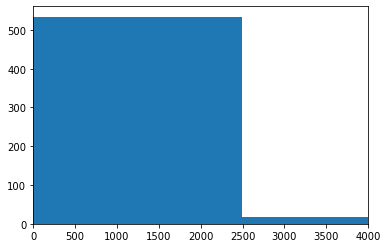

In [86]:
plt.hist(y)
plt.xlim([0, 4000])